In [3]:
import pandas as pd
import xlrd 
import xlwt
import xlsxwriter

In [4]:
file = "/Users/abigailpozulp/Downloads/movies.xls"
movies = pd.read_excel(file)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [8]:
# Name the 3 sheets
movies_sheet1 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_sheet2 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_sheet3 = pd.read_excel(file, sheet_name=2, index_col=0)
# Combine the 3 sheets
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

## Exercises:
## Ex.1 
From the movies spreadsheet in the above tutorial, make a histogram of all the years movies were made, combining the data in three sheets. Make two plots, one with bins (bars) of 10 years width, and one with bins of 20 years width. Label your axes and change the color of the bars. Interpret this data, i.e. describe the change in the number of movies made over time.

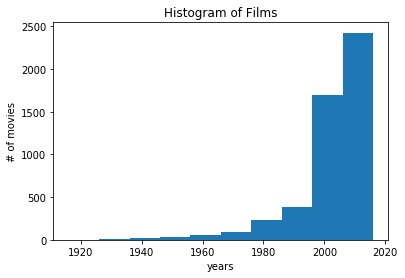

In [25]:
movies['Year'].plot(kind="hist")
plt.title('Histogram of Films')
plt.xlabel('years')
plt.ylabel('# of movies')
plt.show()



In [26]:
#look for how to customize the historgram...I don't know how to change bins or color
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of programmatic
    plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        
        x : sequence of scalar
        
        detrend : callable, optional, default: `mlab.detrend_none`
            *x* is detrended by the *detrend* callable. Default is no
            normalization.
        
        normed : bool, optional, default: True
            If ``True``, input vectors are normalised 

/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)

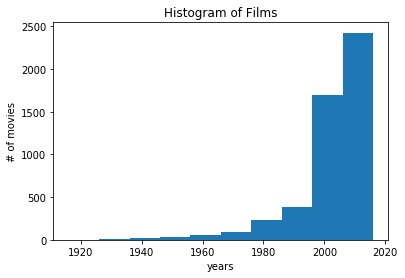

In [50]:
#20-year wide bins

movies['Year'].plot(kind="hist")
plt.bin_size = 20; min_edge = 1920; max_edge = 2020
plt.title('Histogram of Films')
plt.xlabel('years')
plt.ylabel('# of movies')
plt.show()



In [65]:
#it's not working
#tried it a different way

## Ex.1 answer
I made the two histograms below, binned, color, title/lable. My interpretation of this data is that the number of movies made per year is increasing over time


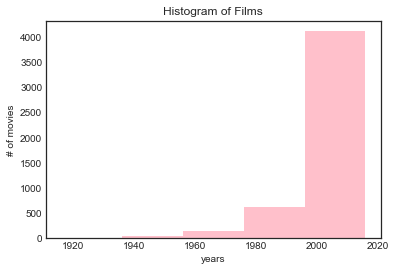

In [64]:
#20-year bins
data = movies['Year']
plt.hist(data, bins=5, color='pink', edgecolor='none');
plt.title('Histogram of Films')
plt.xlabel('years')
plt.ylabel('# of movies')
plt.show()


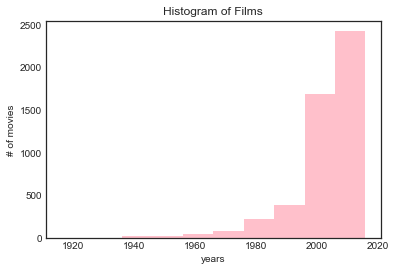

In [67]:
#20-year bins
data = movies['Year']
plt.hist(data, bins=10, color='pink', edgecolor='none');
plt.title('Histogram of Films')
plt.xlabel('years')
plt.ylabel('# of movies')
plt.show()



## Ex. 2
Make a scatterplot of budget vs. year (x-axis), again combining data from the three sheets. Label your axes. What kind of trend is there in this data, how do budgets change over time? Is the relationship linear?

In [68]:
#make a subset
movies_subset = movies[['Year', 'Budget']]

#We now call pivot_table on this subset of data. 
#The method pivot_table takes a parameter index. As mentioned, we want to use Year as the index.

Budget_by_year = movies_subset.pivot_table(index=['Year'])

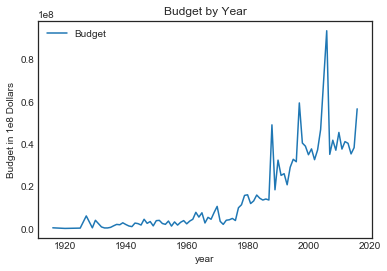

In [70]:
Budget_by_year.plot()
plt.title('Budget by Year')
plt.xlabel('year')
plt.ylabel('Budget in 1e8 Dollars')
plt.show()

## Ex. 2 Answer

There is an upward trend in this data, budgets are somewhat reactionary, the spikes upward are followed quickly by downward spikes. It is not linear. I think the spikes might indicate economic trends

## Ex. 3 
Make a scatterplot of budget vs. gross earnings for all of the data. Describe the relationship between these variables, are they correlated?

Text(0, 0.5, 'Gross Earnings')

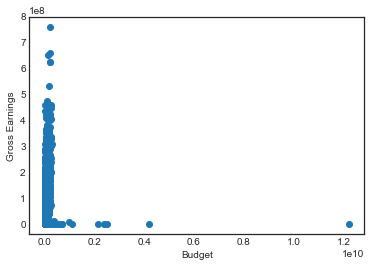

In [88]:
x= movies['Budget']
y= movies['Gross Earnings']

plt.scatter(x, y)
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

## Ex. 3 Answer
It looks like they are a little correlated, the larger budget movies do not predict greater gross earnings, instead, the larger the budget, lower Gross Earnings occurred


## Ex. 4 
What is the lowest IMDB score? Find this using the programming techniques we learned in class

In [92]:
movies["IMDB Score"].min()

1.6

## Ex. 4 Answer
1.6(see above)

## Ex. 5 
Find the names of all the movies with an IMDB score below 5 and put them in an array or list, with an associated array of their IMDB scores. Write these titles and scores to a text file with the appropriate header information

In [ ]:
# df[df[col] > 0.5] | Rows where the column col is greater than 0.5